In [73]:
from commonfunctions import *
import cv2 as cv

In [74]:
# Function to find the list containing the most contours from a list of contour lists.
def get_largest_contour_list(contour_lists: List[List]) -> List[List]:
    # If there are no contour lists, return an empty list.
    if not contour_lists:
        return []
    
    # Check if the input is empty, raise an error if it is.
    if not contour_lists:
        raise ValueError("Input must contain at least one list of contours.")
    
    # Find and return the contour list with the largest number of contours.
    largest_contour_list = max(contour_lists, key=len)
    return [largest_contour_list]

# Function that processes and enhances the brightness of an RGB image by adjusting pixel values.
def enhance_bright_image_rgb(image):
    enhanced_image = image.copy()
    
    # Loop through all color channels (Red, Green, Blue).
    for channel in range(3):  
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                pixel_value = image[y, x, channel]
                
                # Scale pixel values in the range [200, 230] to [240, 255].
                if 200 <= pixel_value <= 230:
                    enhanced_image[y, x, channel] = 240 + (pixel_value - 200) * (255 - 240) // (230 - 200)
                # If pixel value is above 230, set it to 255.
                elif pixel_value > 230:
                    enhanced_image[y, x, channel] = 255
                # Otherwise, keep pixel values below 200 unchanged.
                else:
                    enhanced_image[y, x, channel] = pixel_value
    
    return enhanced_image

# Function that processes and enhances dark RGB images by adjusting pixel values in a specified range.
def enhance_dark_image_rgb(image):
    enhanced_image = image.copy()
    
    # Loop through all color channels (Red, Green, Blue).
    for channel in range(3):  
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                pixel_value = image[y, x, channel]
                
                # Scale pixel values in the range [130, 200] to [230, 255].
                if 130 <= pixel_value <= 200:
                    enhanced_image[y, x, channel] = 230 + (pixel_value - 130) * (255 - 230) // (200 - 130)
                # If pixel value is above 200, set it to 255.
                elif pixel_value > 200:
                    enhanced_image[y, x, channel] = 255
                # Otherwise, keep pixel values below 130 unchanged.
                else:
                    enhanced_image[y, x, channel] = pixel_value
    
    return enhanced_image

# Function that processes and enhances very dark RGB images by adjusting pixel values for better visibility.
def enhance_very_dark_image_rgb(image):
    enhanced_image = image.copy()
    
    # Process each color channel separately.
    for channel in range(3):  
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                pixel_value = image[y, x, channel]
                
                # Scale pixel values in the range [90, 150] to [230, 250].
                if 90 <= pixel_value <= 150:
                    enhanced_image[y, x, channel] = 230 + (pixel_value - 90) * (250 - 230) // (150 - 90)
                # If pixel value exceeds 150, leave it unchanged.
                elif pixel_value > 150:
                    enhanced_image[y, x, channel] = pixel_value
                # Otherwise, keep pixel values below 90 unchanged.
                else:
                    enhanced_image[y, x, channel] = pixel_value
    
    return enhanced_image

# Function that enhances the brightness of a grayscale image by adjusting pixel values in a specific range.
def enhance_bright_image(image):
    enhanced_image = image.copy()
    
    # Loop through all pixels in the image.
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            pixel_value = image[y, x]
            
            # Scale pixel values in the range [200, 230] to [240, 255].
            if 200 <= pixel_value <= 230:
                enhanced_image[y, x] = 240 + (pixel_value - 200) * (255 - 240) // (230 - 200)
            # If pixel value is above 230, set it to 255.
            elif pixel_value > 230:
                enhanced_image[y, x] = 255
            # Otherwise, leave pixel values below 200 unchanged.
            else:
                enhanced_image[y, x] = pixel_value
    
    return enhanced_image

# Function that enhances the brightness of dark grayscale images by adjusting pixel values in a specified range.
def enhance_dark_image(image):
    enhanced_image = image.copy()
    
    # Loop through all pixels in the image.
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            pixel_value = image[y, x]
            
            # Scale pixel values in the range [130, 200] to [230, 255].
            if 130 <= pixel_value <= 200:
                enhanced_image[y, x] = 230 + (pixel_value - 130) * (255 - 230) // (200 - 130)
            # If pixel value exceeds 200, set it to 255.
            elif pixel_value > 200:
                enhanced_image[y, x] = 255
            # Otherwise, leave pixel values below 130 unchanged.
            else:
                enhanced_image[y, x] = pixel_value
    
    return enhanced_image

In [75]:
def calculate_percentage_of_ones(binary_img):
    # Count the number of pixels with value 1 (white) in the binary image
    num_ones = np.count_nonzero(binary_img)

    # Get the total number of pixels in the image
    total_pixels = binary_img.size

    # Calculate the percentage of pixels with value 1 (white) by dividing
    # the number of 1's by the total pixels and multiplying by 100
    percentage_of_ones = (num_ones / total_pixels) * 100

    return percentage_of_ones

In [76]:
import numpy as np
import cv2 as cv
from scipy.signal import find_peaks, peak_widths

# Enhances the RGB image by adjusting the pixel values in each channel
def enhance_image_rgb(image):
    enhanced_image = image.copy()

    for channel in range(3):  # Process R, G, B channels
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                pixel_value = image[y, x, channel]
                
                # Enhance dark to very dark pixel values (90 to 200)
                if 90 <= pixel_value <= 200:
                    if pixel_value <= 130:
                        # Scale very dark pixels between 90 and 150 to 230 to 250
                        enhanced_image[y, x, channel] = 230 + (pixel_value - 90) * (250 - 230) // (150 - 90)
                    elif pixel_value <= 200:
                        # Scale dark pixels between 130 and 200 to 230 to 255
                        enhanced_image[y, x, channel] = 230 + (pixel_value - 130) * (255 - 230) // (200 - 130)
                # Enhance bright pixels (200 to 230 range)
                elif 200 <= pixel_value <= 230:
                    # Scale bright pixels between 200 and 230 to 240 to 255
                    enhanced_image[y, x, channel] = 240 + (pixel_value - 200) * (255 - 240) // (230 - 200)
                elif pixel_value > 230:
                    # Keep values above 230 as they are (already maximized)
                    enhanced_image[y, x, channel] = 255
                else:
                    # Keep values below 90 unchanged (dark/black areas)
                    enhanced_image[y, x, channel] = pixel_value

    return enhanced_image


# Enhances the grayscale image by adjusting pixel values
def enhance_image(image):
    enhanced_image = image.copy()

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            pixel_value = image[y, x]
                
            # Enhance dark to very dark pixel values (90 to 200)
            if 90 <= pixel_value <= 200:
                if pixel_value <= 130:
                    # Scale very dark pixels between 90 and 150 to 230 to 250
                    enhanced_image[y, x] = 230 + (pixel_value - 90) * (250 - 230) // (150 - 90)
                elif pixel_value <= 200:
                    # Scale dark pixels between 130 and 200 to 230 to 255
                    enhanced_image[y, x] = 230 + (pixel_value - 130) * (255 - 230) // (200 - 130)
            # Enhance bright pixels (200 to 230 range)
            elif 200 <= pixel_value <= 230:
                # Scale bright pixels between 200 and 230 to 240 to 255
                enhanced_image[y, x] = 240 + (pixel_value - 200) * (255 - 240) // (230 - 200)
            elif pixel_value > 230:
                # Keep values above 230 as they are (already maximized)
                enhanced_image[y, x] = 255
            else:
                # Keep values below 90 unchanged (dark/black areas)
                enhanced_image[y, x] = pixel_value

    return enhanced_image


# Detects salt-and-pepper noise in an image by analyzing the histogram
def has_salt_and_pepper_noise(image):
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Flatten the image for histogram analysis
    flattened_image = image.flatten()
    hist, bins = np.histogram(flattened_image, bins=256, range=(0, 255))

    # Detect peaks
    peaks, properties = find_peaks(hist, prominence=0.1 * np.max(hist))  # Prominent peaks
    widths = peak_widths(hist, peaks, rel_height=0.5)[0]  # Measure widths at half prominence

    # Filter peaks that are narrow (spikes)
    spike_indices = [i for i, width in enumerate(widths) if width <= 2]  # Adjust width threshold
    spikes = peaks[spike_indices]

    # Count spikes
    num_spikes = len(spikes)
    print(f"Detected Impulses (Spikes): {num_spikes}")

    # Decision based on spike count
    if num_spikes >= 5:  # Adjust threshold as needed
        return True
    return False


# Checks whether the red channel is dominating in an image
def detect_dominant_red_channel(image, red_threshold=1.3):
    # Ensure the image has 3 channels (RGB)
    if image.shape[-1] != 3:
        raise ValueError("Image must be an RGB image")

    # Split the image into R, G, B channels
    R = image[:, :, 0]
    G = image[:, :, 1]
    B = image[:, :, 2]

    # Calculate the mean intensity of each channel
    mean_R = np.mean(R)
    mean_G = np.mean(G)
    mean_B = np.mean(B)

    print(f"Mean R: {mean_R:.2f}, Mean G: {mean_G:.2f}, Mean B: {mean_B:.2f}")

    # Check if the red channel is dominant compared to green and blue
    if mean_R > red_threshold * mean_G and mean_R > red_threshold * mean_B:
        print("The red channel is dominant.")
        return True
    else:
        print("The red channel is not dominant.")
        return False
    
# Equalizes the red channel in an image
def equalizeredchannel(img):
    img = img.astype(np.float32)
    
    red_channel = img[:, :, 0]
    green_channel = img[:, :, 1]
    blue_channel = img[:, :, 2]

    # Scale the red channel values to adjust contrast
    original_red = np.clip(red_channel / 1.5, 0, 255).astype(np.uint8)
    
    # Reconstruct the image with the equalized red channel
    equalized_img = np.stack((original_red, green_channel, blue_channel), axis=2).astype(np.uint8)
    return equalized_img
    

# Detects Gaussian noise by comparing the image with a blurred version
def detect_gaussian_noise(image, threshold_std=10):
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    else:
        gray = image

    # Smooth the image using Gaussian Blur
    blurred = cv.GaussianBlur(gray, (5, 5), 1.0)

    # Subtract the blurred image from the original image to isolate noise
    noise = gray.astype(np.float32) - blurred.astype(np.float32)

    # Calculate the standard deviation of the noise
    noise_std = np.std(noise)
    print(f"Noise Standard Deviation: {noise_std:.2f}")

    # Threshold to classify noise
    if noise_std > threshold_std:
        print("Gaussian noise detected.")
        return True
    else:
        print("No significant Gaussian noise detected.")
        return False


In [77]:
import numpy as np
import cv2 as cv
from scipy.ndimage import binary_dilation, binary_erosion

def Img_segmentation_and_enhancement(ImgPath):
    # Read the image from the provided path
    img = cv.imread(ImgPath)
    # Resize the image if it is smaller than the specified dimensions
    if img.shape[0] < 800 and img.shape[1] < 600:
        img = cv.resize(img, (800, 600))
    
    imgg = img  # Store the original image for later use
    
    # Check for salt-and-pepper noise and apply median filtering if present
    if has_salt_and_pepper_noise(img):
        print("Salt and pepper noise detected!")
        img = median_filter(img, size=3)  # Apply median filter to remove noise
    else:
        print("No salt and pepper noise detected.")
    
    # Convert the image data type to uint8 if it's in float64
    if img.dtype == np.float64:
        img = img.astype(np.uint8)
    
    # Convert the image from BGR to RGB color space
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    image = np.copy(img)
    
    # If the image has an alpha channel (RGBA), convert it to RGB
    if img.shape[2] == 4:
        image = rgba2rgb(image)
    
    # Check if the red channel is excessively dominant and adjust if necessary
    if detect_dominant_red_channel(image):
        print("Excessive red channel detected.")
        img = equalizeredchannel(img)  # Apply red channel equalization
    else:
        print("No excessive red channel detected.")
    
    # Check for Gaussian noise and apply Gaussian filtering if detected
    if detect_gaussian_noise(img, threshold_std=15):
        print("Image contains additive Gaussian noise.")
        img = gaussian(img, sigma=1.3)  # Apply Gaussian filter to reduce noise
    else:
        print("Image does not contain significant Gaussian noise.")
    
    # Check if the image is grayscale or RGB and get its dimensions
    if len(img.shape) == 3:
        height, width, channel = img.shape
    elif len(img.shape) == 2:
        height, width = img.shape
    
    # Convert the image to grayscale for further processing
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Enhance the RGB image using the enhancement function
    img = enhance_image_rgb(img)
    
    # Define a target color for segmentation (light gray color)
    TargetColor = np.array([240/255, 240/255, 240/255]) 
    
    # Normalize the image to the range [0, 1] by dividing by 255
    img = img.astype(float) / 255
    
    # Extract the R, G, and B channels
    RedChannel = img[:,:,0]
    GreenChannel = img[:,:,1]
    BlueChannel = img[:,:,2]
    
    # Calculate the differences between each channel and the target color
    DiffRed = np.abs(RedChannel - TargetColor[0])
    DiffGreen = np.abs(GreenChannel - TargetColor[1])
    DiffBlue = np.abs(BlueChannel - TargetColor[2])
    
    # Calculate the overall distance from the target color using Euclidean distance
    Distance = np.sqrt(DiffRed**2 + DiffGreen**2 + DiffBlue**2)
    
    # Create a mask based on a distance threshold
    Threshold = 0.1  # Set threshold for pixel selection
    Mask = np.where(Distance < Threshold, True, False)
    
    # Define a new color to replace the selected pixels in the mask (R=230, G=90, B=40)
    ReplacedColor = np.array([230/255, 90/255, 40/255])
    
    # Create a copy of the image to apply the new color
    modified_img = np.copy(img)
    
    # Perform morphological operations (dilation and erosion) on the mask
    struct_elem = np.ones((2, 3))
    img_dilated1 = binary_dilation(Mask, struct_elem).astype(img.dtype)
    
    struct_elem = np.ones((12, 4))
    img_closed = binary_erosion(img_dilated1, struct_elem).astype(img.dtype)
    
    struct_elem = np.ones((70, 180))
    img_dilated = binary_dilation(img_closed, struct_elem).astype(img.dtype)
    
    # Calculate the percentage of ones (white pixels) in the dilated mask
    percentageOfOnes = calculate_percentage_of_ones(img_dilated)
    
    # Apply the new color to the image where the mask is True
    modified_img[Mask] = ReplacedColor
    
    # Return the grayscale image, dilated mask, percentage of white pixels, and the original image
    return gray, img_dilated, percentageOfOnes, imgg


In [78]:
def geting_contours_and_draw_it(gray , imgg):
    # Convert to binary image using a simple threshold
    # Pixels greater than 210 are set to 255 (white), others set to 0 (black)
    ret, binary_img = cv.threshold(gray, 210, 255, cv.THRESH_BINARY)
    
    # Apply adaptive thresholding to grayscale image for binary conversion
    # Uses mean of local neighborhood, block size = 71, and constant C = 71
    thresholded_img_adaptive = cv.adaptiveThreshold(gray, maxValue=255.0, adaptiveMethod=cv.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv.THRESH_BINARY_INV, blockSize=71, C=71)
    
    # Define structuring element for dilation (50x50)
    struct_elem = np.ones((50, 50))
    # Apply binary dilation to the binary image
    img_Dilatedd_adaptive = binary_dilation(binary_img, struct_elem).astype(gray.dtype)

    # Find contours in the binary image using OpenCV's findContours
    contours, _ = cv.findContours(binary_img, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
    
    # Draw contours on a copy of the original image (imgg) using green color
    contours_img = cv.drawContours(imgg.copy(), contours, -1, (0, 255, 0), 2)

    # Return the dilated image after adaptive thresholding
    return img_Dilatedd_adaptive


def get_the_masked_img(gray , img_Dilatedd_adaptive , img_dilated , percentageOfOnes):
    # Create an empty image to hold the result
    masked_img_dilated = np.zeros_like(gray)
    # Retain the grayscale values where the dilated mask is 255
    masked_img_dilated[img_dilated >= 1] = gray[img_dilated >= 1]
    
    # Create another empty image for the adaptive dilation mask
    masked_img_dilated_adaptivaly = np.zeros_like(gray)
    # Retain the grayscale values where the adaptive dilated mask is 255
    masked_img_dilated_adaptivaly[img_Dilatedd_adaptive >= 1] = gray[img_Dilatedd_adaptive >= 1]
    
    # Conditional check based on percentageOfOnes to select the correct mask
    if percentageOfOnes >= 90 and percentageOfOnes < 91:
        output_img = masked_img_dilated_adaptivaly
    elif percentageOfOnes >= 99:
        output_img = masked_img_dilated_adaptivaly
    else:
        output_img = masked_img_dilated  # Default: use dilated mask

    # Return the final output image based on the selected mask
    return output_img


def get_thresholding_for_the_output_image(output_img):
    # Apply Gaussian blur to smooth the output image
    blurred_img = cv.GaussianBlur(output_img, ksize=(5, 5), sigmaX=0)
    
    # Apply adaptive thresholding to the blurred image to segment the features
    thresholded_img = cv.adaptiveThreshold(blurred_img, maxValue=255.0, adaptiveMethod=cv.ADAPTIVE_THRESH_MEAN_C,thresholdType=cv.THRESH_BINARY_INV, blockSize=19, C=9)
    
    # Return the thresholded image
    return thresholded_img


def get_contours_and_draw_them_as_rectangles(thresholded_img, img):
    # Check the shape of the image and extract dimensions
    if len(img.shape) == 3:
        height, width, channel = img.shape
    elif len(img.shape) == 2:
        height, width = img.shape
    
    # Find contours in the thresholded image using findContours method
    contours, _ = cv.findContours(thresholded_img, mode=cv.RETR_LIST, method=cv.CHAIN_APPROX_SIMPLE)
    
    # Initialize a blank image to draw contours on
    temp_result = np.zeros((height, width, channel), dtype=np.uint8)
    
    # Draw all contours on the temporary result image
    cv.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))
    
    contours_dict = []  # List to hold information about contours

    # Loop through the detected contours to create bounding boxes around them
    for contour in contours:
        # Get the bounding rectangle (x, y, width, height)
        x, y, w, h = cv.boundingRect(contour)
        # Draw the rectangle on the temporary result image
        cv.rectangle(temp_result, pt1=(x, y), pt2=(x + w, y + h), color=(255, 255, 255), thickness=1)
        
        # Store contour and rectangle information in a dictionary
        contours_dict.append({'contour': contour, 'x': x, 'y': y, 'w': w, 'h': h, 'cx': x + (w / 2), 'cy': y + (h / 2)})
    
    # Return the dictionary with contour details
    return contours_dict


In [79]:
# First stage of filtering contours based on certain criteria
def first_stage_of_filtering_contours(contours_dict, img):
    show_images([img])
    # Get image dimensions
    if len(img.shape) == 3:
        height, width, channel = img.shape
    elif len(img.shape) == 2:
        height, width = img.shape

    # Define filtering thresholds
    min_area = 149
    max_area = 3000
    min_width, min_height = 1, 5
    min_ratio, max_ratio = 0.25, 1.2
    possible_contours = []

    # Iterate over each contour in the contours dictionary
    cnt = 0
    for d in contours_dict:
        area = d['w'] * d['h']  # Calculate area of the contour
        ratio = d['w'] / d['h']  # Calculate the aspect ratio

        # Apply filters based on area, width, height, and aspect ratio
        if min_area < area < max_area and d['w'] > min_width and d['h'] > min_height and min_ratio < ratio < max_ratio:
            d['idx'] = cnt
            cnt += 1
            possible_contours.append(d)

    # Create a temporary result image to visualize the selected contours
    temp_result = np.zeros((height, width, channel), dtype=np.uint8)
    for d in possible_contours:
        cv.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x'] + d['w'], d['y'] + d['h']), color=(255, 255, 255), thickness=2)

    # Return the possible contours that passed the filter
    return possible_contours


# Function to find matching characters based on spatial relationships
def find_chars(contours_list, max_diag_multiplyer, max_angle_diff, max_area_diff, max_width_diff, max_height_diff, min_n_matched):
    matched_result_idx = []

    # Iterate over each contour in the list
    for d1 in contours_list:
        matched_contour_idx = []
        for d2 in contours_list:
            # Skip matching the same contour
            if d1['idx'] == d2['idx']:
                continue

            # Calculate differences between the contours
            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length = np.sqrt(d1['w'] * 2 + d1['h'] * 2)
            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))

            angle_diff = 90 if dx == 0 else np.degrees(np.arctan(dy / dx))

            # Calculate the differences in area, width, and height
            area_diff = abs((d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h']))
            width_diff = abs((d1['w'] - d2['w']) / d1['w'])
            height_diff = abs((d1['h'] - d2['h']) / d1['h'])

            # Check if the contours match based on the specified thresholds
            if distance < diagonal_length * max_diag_multiplyer and angle_diff < max_angle_diff \
                and area_diff < max_area_diff and width_diff < max_width_diff and height_diff < max_height_diff:
                matched_contour_idx.append(d2['idx'])

        # If there are enough matched contours, save the match
        if len(matched_contour_idx) < min_n_matched:
            continue

        matched_result_idx.append([d1['idx']] + matched_contour_idx)

        # Get unmatched contours and recursively check them
        unmatched_contour_idx = [d4['idx'] for d4 in contours_list if d4['idx'] not in matched_contour_idx]

        if not unmatched_contour_idx:
            break

        unmatched_contour = np.array([d for d in contours_list if d['idx'] in unmatched_contour_idx])
        recursive_contour_list = find_chars(unmatched_contour, max_diag_multiplyer, max_angle_diff, max_area_diff, max_width_diff, max_height_diff, min_n_matched)

        # Append the results of the recursive search
        for idx in recursive_contour_list:
            matched_result_idx.append(idx)

        break

    # Return the matched results
    return matched_result_idx


# Second stage of filtering contours
def second_stage_of_contour_filtering(possible_contours, img):
    # Get image dimensions
    if len(img.shape) == 3:
        height, width, channel = img.shape
    elif len(img.shape) == 2:
        height, width = img.shape

    # Find matching contours using the find_chars function
    result_idx = find_chars(possible_contours, max_diag_multiplyer=4.1, max_angle_diff=25.0, max_area_diff=1.47, max_width_diff=1.5, max_height_diff=0.18, min_n_matched=4)

    matched_resultx = []
    for idx_list in result_idx:
        matched_resultx.append(np.take(possible_contours, idx_list))

    # Create a temporary result image to visualize the matched contours
    temp_resultx = np.zeros((height, width, channel), dtype=np.uint8)
    for r in matched_resultx:
        for d in r:
            cv.rectangle(temp_resultx, pt1=(d['x'], d['y']), pt2=(d['x'] + d['w'], d['y'] + d['h']), color=(255, 255, 255), thickness=2)

    # Create another temporary result image for the largest matched contours
    temp_result = np.zeros((height, width, channel), dtype=np.uint8)
    matched_result = get_largest_contour_list(matched_resultx)

    for r in matched_result:
        for d in r:
            cv.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x'] + d['w'], d['y'] + d['h']), color=(255, 255, 255), thickness=2)

    # Return the matched results
    return matched_result


# Function to draw the contours on the original image
def Draw_contours_on_the_real_img(possible_contours, imgg):
    # Get image dimensions
    if len(imgg.shape) == 3:
        height, width, channel = imgg.shape
    elif len(imgg.shape) == 2:
        height, width = imgg.shape

    # Find matching contours using the find_chars function
    result_idx = find_chars(possible_contours, max_diag_multiplyer=4.1, max_angle_diff=25.0, max_area_diff=1.47, max_width_diff=1.5, max_height_diff=0.18, min_n_matched=4)

    matched_resultx = []
    for idx_list in result_idx:
        matched_resultx.append(np.take(possible_contours, idx_list))

    # Get the largest matched contours
    matched_result = get_largest_contour_list(matched_resultx)

    # Draw rectangles around the matched contours on the original image
    for r in matched_result:
        for d in r:
            cv.rectangle(imgg, pt1=(d['x'], d['y']), pt2=(d['x'] + d['w'], d['y'] + d['h']), color=(0, 255, 0), thickness=2)


# Third stage: Filtering and extracting the license plate
def third_stage_of_contour_filtering_and_plate_extraction(matched_result, thresholded_img, img):
    # Get image dimensions
    if len(img.shape) == 3:
        height, width, channel = img.shape
    elif len(img.shape) == 2:
        height, width = img.shape

    # Define parameters for plate extraction
    plate_width_padding = 0.6
    plate_height_padding = 1.5
    min_plate_ratio = 1
    max_plate_ratio = 2

    plate_imgs = []
    plate_infos = []

    # Iterate over matched contours to extract potential license plates
    for i, matched_chars in enumerate(matched_result):
        # Sort the characters based on their x-coordinate
        sorted_chars = sorted(matched_chars, key=lambda x: x['cx'])

        # Calculate the center and size of the license plate
        plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx']) / 2
        plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy']) / 2

        plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['w']) * plate_width_padding

        sum_height = 0
        for d in sorted_chars:
            sum_height += d['h']

        plate_height = int(sum_height / len(sorted_chars) * plate_height_padding)

        # Calculate the angle to rotate the plate based on the contour positions
        triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
        triangle_hypotenus = np.linalg.norm(
            np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) -
            np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])
        )

        angle = np.degrees(np.arcsin(triangle_height / triangle_hypotenus))

        # Rotate the image to align the license plate
        rotation_matrix = cv.getRotationMatrix2D(center=(plate_cx, plate_cy), angle=angle, scale=1.0)
        img_rotated = cv.warpAffine(thresholded_img, M=rotation_matrix, dsize=(width, height))

        # Crop the rotated image to extract the license plate
        img_cropped = cv.getRectSubPix(
            img_rotated,
            patchSize=(int(plate_width), int(plate_height)),
            center=(int(plate_cx), int(plate_cy))
        )

        # Filter based on aspect ratio of the cropped image
        if img_cropped.shape[1] / img_cropped.shape[0] < min_plate_ratio or img_cropped.shape[1] / img_cropped.shape[0] > max_plate_ratio:
            continue

        # Add the extracted plate and its information to the results
        plate_imgs.append(img_cropped)
        plate_infos.append({
            'x': int(plate_cx - plate_width / 2),
            'y': int(plate_cy - plate_height / 2),
            'w': int(plate_width),
            'h': int(plate_height)
        })

    # Return the cropped image of the license plate
    return img_cropped


In [80]:
def First_stage_of_removing_noise_from_cropped_plate(img_cropped):
    cropped = np.copy(img_cropped)
    # Find contours in the cropped image
    contours, _ = cv.findContours(img_cropped, mode=cv.RETR_LIST, method=cv.CHAIN_APPROX_SIMPLE)
    # Initialize an empty image for drawing the contours
    temp_result = np.zeros((img_cropped.shape[0], img_cropped.shape[1]), dtype=np.uint8)
    # Draw all found contours on the temp_result image
    cv.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))
    
    # Prepare a list to store the contour data
    contours_dict = []

    # Loop over each contour and add it to the list
    for contour in contours:
        x, y, w, h = cv.boundingRect(contour)
        cv.rectangle(temp_result, pt1=(x, y), pt2=(x + w, y + h), color=(255, 255, 255), thickness=1)
        
        # Insert the rectangle details into the dictionary
        contours_dict.append({'contour': contour, 'x': x, 'y': y, 'w': w, 'h': h, 'cx': x + (w / 2), 'cy': y + (h / 2)})
    
    return contours_dict, cropped


def Second_stage_of_removing_noise_from_cropped_plate(contours_dict, img_cropped):
    min_area = 149
    max_area = 2000
    min_width, min_height = 1, 5
    min_ratio, max_ratio = 0.25, 1.62

    possible_contours = []
    cnt = 0
    
    # Loop through contours and filter based on area, width, height, and ratio
    for d in contours_dict:
        area = d['w'] * d['h']
        ratio = d['w'] / d['h']

        if min_area < area < max_area and d['w'] > min_width and d['h'] > min_height and min_ratio < ratio < max_ratio:
            d['idx'] = cnt
            cnt += 1
            possible_contours.append(d)

    # Initialize an empty image to visualize the filtered contours
    temp_result = np.zeros((img_cropped.shape[0], img_cropped.shape[1]), dtype=np.uint8)

    # Draw the filtered contours on the temp_result
    for d in possible_contours:
        cv.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x'] + d['w'], d['y'] + d['h']), color=(255, 255, 255), thickness=2)

    return possible_contours


def remove_edge_rectangles(temp_result, matched_result):
    # Get the height and width of the temp_result image
    height, width = temp_result.shape[:2]
    
    # Create a new blank image to draw valid rectangles
    updated_result = np.zeros_like(temp_result)
    
    # Filter rectangles that do not touch the edges
    for r in matched_result:
        for d in r:
            x, y, w, h = d['x'], d['y'], d['w'], d['h']
            
            # Check if the rectangle touches any edge
            if (x == 0 or x + w == width or  # Left or right edge
                y == 0 or y + h == height): # Top or bottom edge
                continue  # Skip rectangles that touch the edges
            
            # Draw valid rectangles on the updated_result image
            cv.rectangle(updated_result, pt1=(x, y), pt2=(x + w, y + h), color=(255, 255, 255), thickness=cv.FILLED)
    
    return updated_result


def Third_stage_of_removing_noise_from_cropped_plate(possible_contours, img_cropped):
    result_idx = find_chars(possible_contours, max_diag_multiplyer=8, max_angle_diff=25.0, max_area_diff=10, max_width_diff=5, max_height_diff=0.2, min_n_matched=2)

    matched_resultx = []

    # Group matched contours based on characteristics
    for idx_list in result_idx:
        matched_resultx.append(np.take(possible_contours, idx_list))

    # Initialize an empty image for drawing the matched contours
    temp_resultx = np.zeros((img_cropped.shape[0], img_cropped.shape[1]), dtype=np.uint8)
    for r in matched_resultx:
        for d in r:
            cv.rectangle(temp_resultx, pt1=(d['x'], d['y']), pt2=(d['x'] + d['w'], d['y'] + d['h']), color=(255, 255, 255), thickness=2)
    
    # Create another blank image to visualize the final matched contours
    temp_result = np.zeros((img_cropped.shape[0], img_cropped.shape[1]), dtype=np.uint8)

    # Get the largest contour group
    matched_result = get_largest_contour_list(matched_resultx)

    # Draw the largest matched contours
    for r in matched_result:
        for d in r:
            cv.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x'] + d['w'], d['y'] + d['h']), color=(255, 255, 255), thickness=cv.FILLED)

    # Remove rectangles that touch the edges of the image
    updated_temp = remove_edge_rectangles(temp_result, matched_result)

    return temp_result, updated_temp


def apply_mask(image, mask):
    # Ensure the mask is binary (0 or 1) and has the same shape as the image
    mask = mask.astype(np.uint8)  # Convert mask to uint8 for safety
    if mask.shape != image.shape:
        raise ValueError("The image and mask must have the same shape")

    # Apply the mask to the image: element-wise multiplication
    result = cv.bitwise_and(image, mask)
    
    return result


def get_the_plate(cropped, temp_result, updated_temp):
    image1 = apply_mask(cropped, temp_result)

    image = apply_mask(cropped, updated_temp)

    return image


In [81]:
def full_process_function(img_path):
    gray , img_dilated , percentageOfOnes , imgg = Img_segmentation_and_enhancement(img_path)
    show_images([img_dilated])
    img_Dilatedd_adaptive = geting_contours_and_draw_it(gray , imgg)
    show_images([img_Dilatedd_adaptive])
    output_img =get_the_masked_img(gray, img_Dilatedd_adaptive , img_dilated ,percentageOfOnes )
    show_images([output_img])
    thresholded_img = get_thresholding_for_the_output_image(output_img)
    show_images([thresholded_img])
    contours_dict = get_contours_and_draw_them_as_rectangles(thresholded_img , imgg)
    show_images([imgg])
    possible_contours = first_stage_of_filtering_contours(contours_dict , imgg)
    matched_result = second_stage_of_contour_filtering(possible_contours , imgg)
    Draw_contours_on_the_real_img(possible_contours , imgg)
    img_cropped = third_stage_of_contour_filtering_and_plate_extraction(matched_result,thresholded_img , imgg)
    show_images([img_cropped])
    print(matched_result)
    contours_dict , cropped =First_stage_of_removing_noise_from_cropped_plate(img_cropped)
    print(cropped)
    show_images([cropped])
    print(contours_dict)
    possible_contours = Second_stage_of_removing_noise_from_cropped_plate(contours_dict ,cropped )
    print(possible_contours)
    temp_result ,updated_temp =Third_stage_of_removing_noise_from_cropped_plate( possible_contours , cropped)
    print(temp_result)
    print(updated_temp)
    show_images([updated_temp])
    show_images([temp_result])
    image = get_the_plate(cropped , temp_result , updated_temp)
    show_images([image])

    return image

In [82]:
def extract_hog_features(img):
    # Resize the input image to ensure consistent dimensions for feature extraction
    target_img_size = (32, 32)
    img = cv.resize(img, target_img_size)

    # Define HOG parameters
    win_size = (32, 32)
    cell_size = (4, 4)
    block_size_in_cells = (2, 2)
    block_size = (block_size_in_cells[1] * cell_size[1], block_size_in_cells[0] * cell_size[0])
    block_stride = (cell_size[1], cell_size[0])
    nbins = 9

    # The HOGDescriptor object is configured with the above parameters
    hog = cv.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    
    # The HOG features are calculated for the resized image
    h = hog.compute(img)
    
    # HOG features are returned as a multi-dimensional array, flatten it into a 1D vector
    h = h.flatten()

    return h

In [83]:
def load_dataset():

    path_to_dataset = r'digits_dataset'

    features = []
    labels = []

    # Iterate through subfolders (assume folder name is the label)
    for label_folder in os.listdir(path_to_dataset):
        label_path = os.path.join(path_to_dataset, label_folder)
        
        # Ensure it's a directory (skip files)
        if not os.path.isdir(label_path):
            continue
        
        # Extract label from the folder name
        label = label_folder
        
        # Iterate through the images in the folder
        for img_filename in os.listdir(label_path):
            img_path = os.path.join(label_path, img_filename)
            
            # Read image
            img = cv.imread(img_path)
            
            # Extract features (e.g., HOG features)
            features.append(extract_hog_features(img))
            
            # Append the label
            labels.append(label)
            
            # Show an update every 1,000 images
            if len(features) % 1000 == 0:
                print(f"[INFO] Processed {len(features)} images so far.")

    return features, labels


In [84]:
def run_experiment():
    # fix the random seed to make our experiments reproducible (since some algorithms use pseudorandom generators)
    random_seed = 42  
    random.seed(random_seed)
    np.random.seed(random_seed)
    
    # Load dataset with extracted features
    print('Loading dataset. This will take time ...')
    features, labels = load_dataset()
    print('Finished loading dataset.')
    
    # withhold some images that we will test the classifier on after training 
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=random_seed)
    print("Training KNN")
    
    # Train the model only on the training features
    model = KNeighborsClassifier(n_neighbors=7)

    model.fit(train_features, train_labels)
    
    accuracy = model.score(test_features, test_labels)
    
    print(f"KNN accuracy: {accuracy*100}")

run_experiment()

Loading dataset. This will take time ...
[INFO] Processed 1000 images so far.
[INFO] Processed 2000 images so far.
[INFO] Processed 3000 images so far.
[INFO] Processed 4000 images so far.
[INFO] Processed 5000 images so far.
[INFO] Processed 6000 images so far.
[INFO] Processed 7000 images so far.
[INFO] Processed 8000 images so far.
[INFO] Processed 9000 images so far.
[INFO] Processed 10000 images so far.
[INFO] Processed 11000 images so far.
[INFO] Processed 12000 images so far.
[INFO] Processed 13000 images so far.
[INFO] Processed 14000 images so far.
[INFO] Processed 15000 images so far.
[INFO] Processed 16000 images so far.
[INFO] Processed 17000 images so far.
[INFO] Processed 18000 images so far.
[INFO] Processed 19000 images so far.
[INFO] Processed 20000 images so far.
[INFO] Processed 21000 images so far.
[INFO] Processed 22000 images so far.
[INFO] Processed 23000 images so far.
[INFO] Processed 24000 images so far.
[INFO] Processed 25000 images so far.
[INFO] Processed 2

In [85]:
def split_and_filter_image(image, white_threshold=0.004):

    height, width = image.shape
    
    # split horizontally into 4
    part_width = width // 4   
    accepted_parts = []
    
    # Loop through each part 
    for i in range(4):
        
        x_start = i * part_width
        x_end = (i + 1) * part_width if i != 3 else width  # Ensure the last part includes the remainder
        
        part = image[:, x_start:x_end]  # Take the entire height for each part
        # Count white pixels
        num_white = np.sum(part == 255)
        
        # Calculate the fraction of white pixels in the part
        white_fraction = num_white / (part.size)
        # If the fraction of white pixels is above the threshold, keep the part
        if white_fraction >= white_threshold:
            accepted_parts.append(part)
    
    # Combine accepted parts into one image
    if accepted_parts:
        combined_image = np.concatenate(accepted_parts, axis=1) 
    else:
        # If no parts meet the threshold, return an empty array
        combined_image = np.zeros((height, width), dtype=np.uint8)
    
    return combined_image

In [86]:
# Character Segmentation

def segment_characters(image):

    # Adjust Aspect Ratio of plate
    image = split_and_filter_image(image)

    # Apply binary thresholding and dilation (to make characters clearer)
    _, binary_image = cv.threshold(image,160, 255, cv.THRESH_BINARY_INV)
    binary_image = cv.dilate(binary_image, np.ones((2,1)))

    # Find contours of the characters
    contours, _ = cv.findContours(binary_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    # Sort contours from left to right
    sorted_contours = sorted(contours, key=lambda ctr: cv.boundingRect(ctr)[0])

    # Initialize list to store segmented characters
    segmented_characters = []
    
    width, height = binary_image.shape

    # Loop through contours and extract individual characters
    for i, contour in enumerate(sorted_contours):
        x, y, w, h = cv.boundingRect(contour)
        
        # Filter out small contours
        if w > width/8 and h > height/10 and w < width*7/8:
            char_image = binary_image[y:y+h, x:x+w]
            segmented_characters.append(char_image)
            

    return segmented_characters


In [87]:
# Classifier
def classifyChars(segmented):
    knn = classifiers['KNN']
    detected =[]
    # Loop over segmented characters and detect them using classifier
    for i, char_image in enumerate(segmented):
        features = extract_hog_features(char_image)
        detected.append(knn.predict([features]))
    
    return detected

In [88]:

unordered_map = {}

# assume parking for 1 second = 15 pounds
def calculate_fee(plate_number):
    current_time = time.time()  
    
    # Check if the string is already in the unordered map
    if plate_number in unordered_map:
        # Calculate the time difference
        saved_time = unordered_map.pop(plate_number)
        time_diff = current_time - saved_time
        print(f"Car with plate '{plate_number}'. exited after: {time_diff:.2f} seconds., Fee = {time_diff * 15:.2f}")
        return f"{time_diff * 15:.2f}"
    else:
        # Insert the string with the current time
        unordered_map[plate_number] = current_time
        print(f"Car with plate '{plate_number}' just entered the parking")
        return 0

In [89]:

def preprocess_char_image(char_image):
    # Resize to the input size of the model
    char_image = cv.resize(char_image, (64, 64))

    # Normalize pixel values
    char_image = char_image / 255.0

    # Add batch and channel dimensions
    char_image = char_image.reshape(1, 64, 64, 1)

    return char_image

def predictOCR(segmented_characters):
    # Load the trained model
    model = load_model("chars74k_model.h5")
    print("Model loaded successfully!")

    # Initialize the predicted label
    predicted_label = ""

    # Iterate over each segmented character
    for i, char_image in enumerate(segmented_characters):
        # Preprocess the character image
        char_image = preprocess_char_image(char_image)
        # Predict the character
        predictions = model.predict(char_image)
        char_index = predictions.argmax()

        # Convert the character index to a label (e.g., digit or letter)
        if char_index < 10:
            predicted_label += str(char_index)  # 0-9
        else:
            predicted_label += chr(char_index - 10 + ord('A'))  # A-Z

    return predicted_label


In [90]:
# from flask import Flask, request, jsonify
# from flask_cors import CORS
# import os
# import threading

# # API (Backend)

# server_thread = None
# stop_flag = threading.Event()

# app = Flask("PlateDetect")
# CORS(app)

# @app.route('/extract_plate', methods=['POST'])
# def extract_plate():
#     try:
#         # Save Uploaded Image
#         image_file = request.files['image']
#         image_path = "uploaded_image.jpg"
#         image_file.save(image_path)
#         image_path = "./uploaded_image.jpg"

#         print(f"Processing ${image_file}")

#         image = full_process_function('./input/2.jpg')
#         show_images([image])
        
#         # Segment Characters
#         segmented_chars = segment_characters(image)
#         show_images([segment_character for segment_character in segmented_chars])

#         # Detect Plate Number and Calculate fees (Classifier)
#         classified = classifyChars(segmented_chars)
#         plateNumber = ''.join([item[0] for item in classified])
#         print(classified)
#         fees = calculate_fee(plateNumber)

#         # Detect Plate Number and Calculate fees (OCR Deep Learning Model)
#         plateNumberOCR = predictOCR(segmented_chars)

#         feesOCR = calculate_fee(plateNumberOCR)

#         # Clean Up Stored Image
#         os.remove(image_path)

#         return jsonify({"plate": plateNumber, "fees": fees, "feesOCR": feesOCR, "plateOCR": plateNumberOCR})
#     except Exception as e:
#         return jsonify({"error": str(e)}), 500

# @app.route('/train_model', methods=['POST'])
# # Train Model Endpoint
# def train_model():
#     run_experiment()
#     return jsonify({"message": "Model Training Done."})

# def run_flask():
#     while not stop_flag.is_set():
#         app.run(debug=False, use_reloader=False, port=5001)

# # Start Backend Thread
# server_thread = threading.Thread(target=run_flask)
# server_thread.daemon = True
# server_thread.start()


In [91]:
# if server_thread is not None:
#     stop_flag.set()  # Signal the thread to stop
#     server_thread.join()  # Wait for the thread to finish
#     print("Flask server stopped.")

Detected Impulses (Spikes): 0
No salt and pepper noise detected.
Mean R: 121.26, Mean G: 118.86, Mean B: 111.66
The red channel is not dominant.
No excessive red channel detected.
Noise Standard Deviation: 10.88
No significant Gaussian noise detected.
Image does not contain significant Gaussian noise.


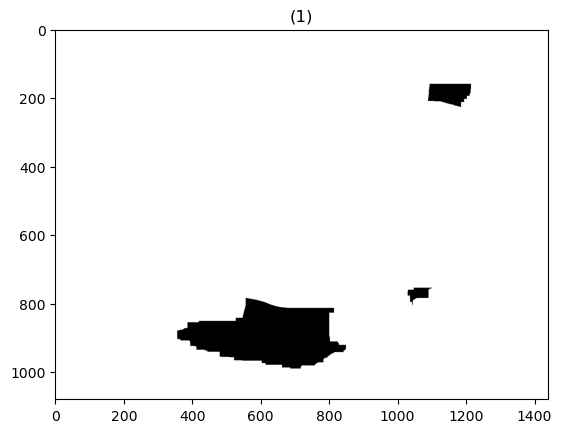

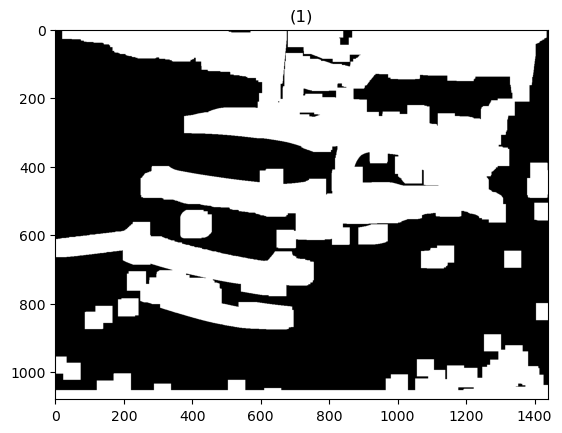

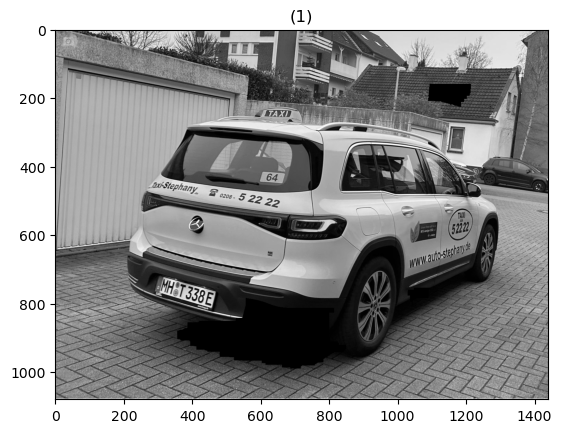

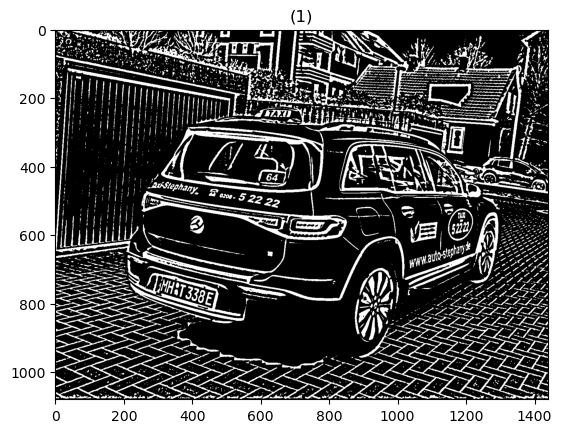

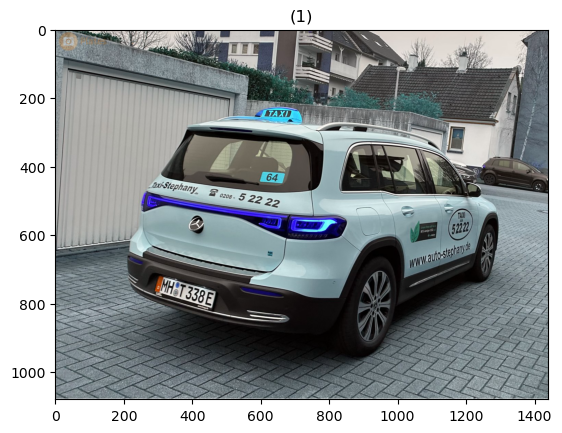

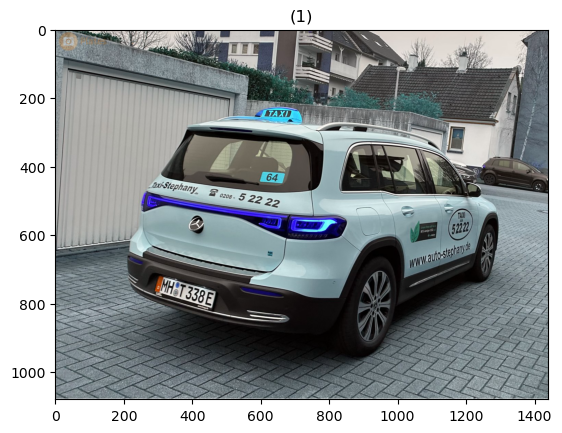

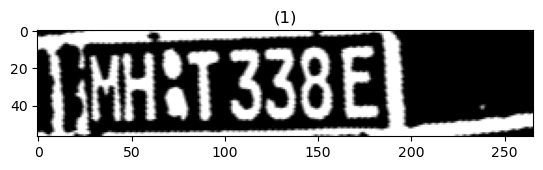

[array([{'contour': array([[[408, 756]],

              [[407, 757]],

              [[407, 760]],

              [[408, 760]],

              [[409, 761]],

              [[411, 761]],

              [[412, 762]],

              [[414, 762]],

              [[416, 764]],

              [[410, 770]],

              [[409, 770]],

              [[407, 772]],

              [[407, 775]],

              [[408, 776]],

              [[409, 776]],

              [[412, 779]],

              [[412, 784]],

              [[411, 785]],

              [[411, 786]],

              [[409, 788]],

              [[406, 788]],

              [[405, 787]],

              [[404, 787]],

              [[403, 786]],

              [[403, 783]],

              [[401, 781]],

              [[400, 782]],

              [[400, 783]],

              [[399, 784]],

              [[399, 788]],

              [[400, 789]],

              [[400, 790]],

              [[402, 792]],

              [[404, 792]],

 

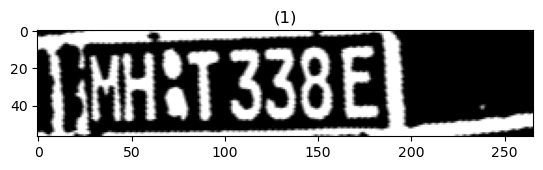

[{'contour': array([[[27, 45]],

       [[28, 44]],

       [[29, 45]],

       [[28, 46]]], dtype=int32), 'x': 27, 'y': 44, 'w': 3, 'h': 3, 'cx': 28.5, 'cy': 45.5}, {'contour': array([[[27, 42]],

       [[28, 41]],

       [[29, 42]],

       [[29, 43]],

       [[28, 44]],

       [[27, 43]]], dtype=int32), 'x': 27, 'y': 41, 'w': 3, 'h': 4, 'cx': 28.5, 'cy': 43.0}, {'contour': array([[[237,  40]],

       [[237,  42]],

       [[239,  42]],

       [[240,  41]],

       [[240,  40]]], dtype=int32), 'x': 237, 'y': 40, 'w': 4, 'h': 3, 'cx': 239.0, 'cy': 41.5}, {'contour': array([[[120,  39]],

       [[121,  38]],

       [[122,  39]],

       [[121,  40]]], dtype=int32), 'x': 120, 'y': 38, 'w': 3, 'h': 3, 'cx': 121.5, 'cy': 39.5}, {'contour': array([[[27, 39]],

       [[28, 38]],

       [[29, 39]],

       [[28, 40]]], dtype=int32), 'x': 27, 'y': 38, 'w': 3, 'h': 3, 'cx': 28.5, 'cy': 39.5}, {'contour': array([[[26, 38]],

       [[27, 37]],

       [[28, 38]],

       [[27, 39]]], 

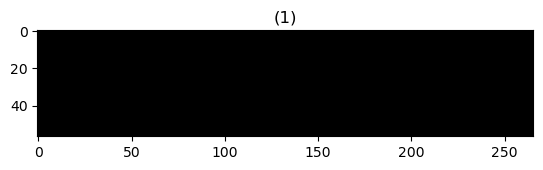

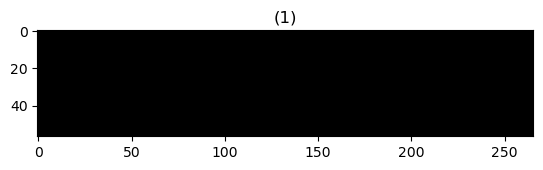

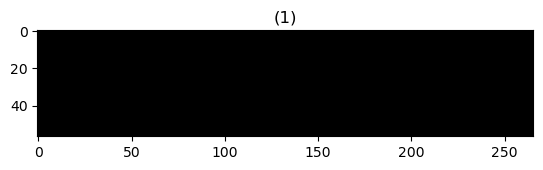

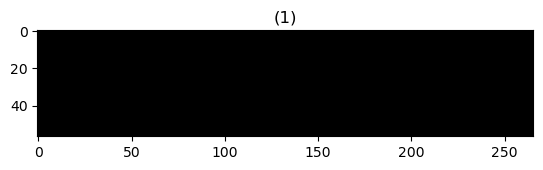

Detected Impulses (Spikes): 0
No salt and pepper noise detected.
Mean R: 121.26, Mean G: 118.86, Mean B: 111.66
The red channel is not dominant.
No excessive red channel detected.
Noise Standard Deviation: 10.88
No significant Gaussian noise detected.
Image does not contain significant Gaussian noise.


In [ ]:
img = full_process_function('./uploaded_image.jpg')
show_images([img])

img = full_process_function('./input/2.jpg')
show_images([img])